# **A framework for identifying structural proteins through diffraction patterns**

The identification of structural protein properties can help solve problems such as determining the cause of diseases and designing drugs. In this jupyter notebook, we will present an approach using X-ray Free Electron Laser (XFEL) based Protein Structure Identifier, also called XPSI, which is a framework that combines deep learning and traditional machine learning to identify the three structural properties (i.e., orientation, conformation, and protein type) through the diffraction patterns of a given protein. The are two main components in this notebook where:
* we learn:  
    * How diffraction data in the form of patterns is experimentally generated with the use of XFEL beams
    * What structural properties of a protein (i.e., orientation, conformation, and protein type) can be embedded into a patterns
* we apply a software framework (XPSI) to identify the structural properties of protein to a dataset of diffraction patterns. The framework is comprised of three components for:
  * Pre-processing data 
      * Load and decompress the dataset
      * Validate the representativeness of datasets
  * Training of an autoencoder 
      * Extract key structural properties from diffraction patterns
      * Transform the properties into tensors
  * Using machine learning (ML)  to model and predict structural properties in new datasets
       * Tune ML models' hyperparameters
       * Validate the predictions through error degree, psi difference, and conformation accuracy

# **Generate diffraction patterns with structural properties**

Proteins have a three-dimensional (3D) structure in nature. When a protein structure is shot with an X-ray Free Electron Laser (XFEL) beam, it produces a diffraction pattern. **Figure 1** shows the experimental process to generate diffraction patterns from 3-D proteins. The pattern is captured on the black screen on the right of the figure. These diffraction patterns embed properties of the proteins that can be revealed by analyzing the images.

<div>
<center><img src="images/experimental-setup1.png" width="800"/>
</div>

<center><b>Figure 1:</b> Experimental process to generate diffraction images from 3-D proteins.

The intensity of the XFEL beam directly affects the quality of the images. This intensity can range from **high** to **low** and generates resulting images of respective resolution. We can consider the example of taking pictures using cameras with different lenses; the higher the resolution, the better the quality of image. **Figure 2** shows three examples of resolutions produced by varying intensities of the XFEL beam (i.e., high, medium, and low). Specifically, in this figures, we represent high, medium, and low resolutions as 1e16, 1e15, and 1e14, respectively. The beam intensity can act as a proxy for the noise embedded into the corresponding images: when the beam intensity is high, the noise is low and vice versa.  


<div>
<center><img src="images/beam-intensity.png" width="700"/>
</div>

<center><b>Figure 2: </b>Three resolution of images created from three varying intensities of the incident beam.

# **Structural Properties**
There are three structural properties that are neccessary to identify in order to have a better understanding of a protein structure. They are orientation, conformation, and protein type.

## **Orientation:**

Orientation refers to the placement of the incident beam with respect to a protein structure. It is described by 3 angles: Φ (Azimuth) = [-180,180], Θ (Altitude) = [0, 180], and Ψ (psi or Rotation angle = [0, 360]. **Figure 3** displays examples of two orientations of the same protein type, formed with the combination of the three angles (Azimuth, Altitude, and Psi)

<div>
<center><img src="images/orientation_jn.png" width="600"/>
</div>

<center><b> Figure 3:</b> Two examples of different orientations for the same protein (i.e., Orientation 1 and Orientation 2)..

## **Conformation:**

The second property is conformation, which is determined by the overall shape of the molecule. Given a state of a protein we have a different shape therefore a different conformation of itself. **Figure 4** shows two examples of conformations (State 1 and State 2).   

<div>
<center><img src="images/conformation_jn.png" width="600"/>
</div>

<center><b> Figure 4:</b> Two examples of different energy states of the protein, forming two different conformations for the same protein (i.e., Conformation A and Conformation B).

## **Protein Type:**

The last property is the identity of the protein structure, which describes the type of protein. **Figure 5**, provides us with examples of two protein types, Protein A and Protein B, with their corresponding conformation and orientation properties. 


<div>
<center><img src="images/proteintype_jn.png" width="600"/>
</div>
<center><b>Figure 5:</b> Two examples of different protein types, with their own conformation and orientation (i.e., Protein type A and Protein type B).


Next, we introduce the XPSI framework that takes these images of diffraction patterns as input, trains a machine learning/deep learning model, and predicts the properties of test images.We retrace the **application** of all the stages of the framework with different dataset.

# **Identify structural properties in difraction patterns using XPSI**
XPSI is a framework that identifies structural properties of proteins (i.e., orientation, conformation, and protein type) by using diffraction patterns.The framework uses an autoencoder to capture key information and produce a tensor representation of each diffraction pattern. Then, the tensor representation is used to train and validate traditional machine learning models such as k-nearest neighbors (kNN) to predict the structural properties of the proteins. A kNN-angle regressor and two kNN-classificators provide the predictions of the orientation, conformation, and protein type respectively.The patterns can be generated experimentally (as in **Figure 1**) or through simulations (in this case the dataset is considered synthetic and is used for training models).

As shown in **Figure 6**, the framework comprises four key modules: (i) a data pre-processing module to load, crop, and normalize images; (ii) an autoencoder module to extract diffraction pattern features; (iii) a ML module to model and predict the three structural properties from the diffraction patterns; and (iv) a validation module to measure the accuracy of the properties predictions. 

![title](images/framework2.png)

<center><b>Figure 6:</b> The XPSI framework includes fours modules: (i) a pre-processing module where the images are loaded, normalized, and cropped; (ii) a feature extraction module where by using an autoencoder the images are compressed and represented in a feature vector; (iii) a ML module where a kNN model is trained and tested to predict structural properties from pattern datasets; and (iv) a validation of the predictions. . 

To implement the software framework, we must first consider the environment settings and dependencies. 

# **Setting the environment for predictions**
Currently, this computational framework is written in Python3 with a Conda environment and uses the following hardware and software settings:

* **Hardware**: We use an HPC cluster awarded to our laboratory by IBM, named Tellico. Tellico has 4 IBM Power9 (128 GB RAM) nodes. Two of the nodes have 4 Nvidia Volta GPUs with 16 GB GPU memory. The complete framework is trained and tested on a single GPU node of Tellico. It is planned to be extended to Jetstreams.
Once the hardaware is established, we move to software.

* **Software (libraries and packages)**: Numpy, Configparser, Matplotlib, Pandas, Scipy, Keras, Ipyfilechooser, and os.

We start by installing the dependencies and importing the packages required to succefully run the notebook.

In [1]:
import sys
sys.path.insert(0, "xpsi/analysis")
import numpy as np
import configparser as cp
import matplotlib.pyplot as plt
from PIL import Image
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
from scipy.spatial import distance
import scipy.stats
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import random
import keras_utils as ku
from plot_utils import *
from testing_autoencoder import *
from ipyfilechooser import FileChooser
import tensorflow as tf
import tensorflow.keras.layers as L
import time
import utils

2022-05-18 14:26:53.545772: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.2
2022-05-18 14:26:54.608996: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.7
2022-05-18 14:26:54.610658: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.7


In [2]:
# Import three software componenets of XPSI
import sys
sys.path.insert(0, "xpsi/workflow_scripts")
from process_data import *
from autoencoder_feature_extraction import *
from predict_properties import *

## 1. Pre-processing of dataset

Before we begin with the pre-processing of data, we access the dataset in it's raw compressed form. To do so, we use the **wget**, a free software package for retrieving files using HTTP, HTTPS, FTP and FTPS, the most widely used Internet protocols. It is a non-interactive commandline tool, so it may easily be called from scripts, cron jobs, terminals without X-Windows support, etc. More information and licensing for wget can be found [here](https://www.gnu.org/software/wget/).

In [3]:
# Create raw_data directory
!mkdir raw_data
# Download raw_data from google drive to local raw_data
print('Retrieving raw data...')
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=13BJOcRwdfubcE7Am6rIutNUuim4rfsJH' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=13BJOcRwdfubcE7Am6rIutNUuim4rfsJH" -O raw_data/pattern_1n0u_ts1_psi_1e14_20200721.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1OpWYaQ20DTYz5opF-DKwz9H9exRPSORY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1OpWYaQ20DTYz5opF-DKwz9H9exRPSORY" -O raw_data/pattern_1n0u_ts1_psi_1e15_20200803.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1a3538OdkaGR2warVX5xWWDnRiuyn_Bkk' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1a3538OdkaGR2warVX5xWWDnRiuyn_Bkk" -O raw_data/pattern_1n0u_ts1_psi_1e16_20200721.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1KkcVsHtjQxOY_bESa7gQmxxkUOg9DOvs' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1KkcVsHtjQxOY_bESa7gQmxxkUOg9DOvs" -O raw_data/pattern_1n0vc_ts1_psi_1e14_20200721.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1dnZAIET8bws7eoMo3G_zwbSvyGOPhyvF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1dnZAIET8bws7eoMo3G_zwbSvyGOPhyvF" -O raw_data/pattern_1n0vc_ts1_psi_1e15_20200803.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1fbzMsAhc2tpZfY0Ot-ZWYqCrIFMdsfxX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1fbzMsAhc2tpZfY0Ot-ZWYqCrIFMdsfxX" -O raw_data/pattern_1n0vc_ts1_psi_1e16_20200721.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1NZMHohwUEP9L_p5vrUncpTcW0BBUF_8R' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1NZMHohwUEP9L_p5vrUncpTcW0BBUF_8R" -O raw_data/pattern_ribo_bc_ts1_psi_1e14_20200803.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rgcsOQRgc-_IzOgDqu6kTsVlAdYFsPqL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1rgcsOQRgc-_IzOgDqu6kTsVlAdYFsPqL" -O raw_data/pattern_ribo_bc_ts1_psi_1e13_20200803.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sI3ATORu_a1YLUIz9RyO52MuGSNhBA14' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sI3ATORu_a1YLUIz9RyO52MuGSNhBA14" -O raw_data/pattern_ribo_9a_ts1_psi_1e14_20200803.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1I-HZq1k5JXew-E_X9brJ9OZIDKstChbx' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1I-HZq1k5JXew-E_X9brJ9OZIDKstChbx" -O raw_data/pattern_ribo_9a_ts1_psi_1e13_20200803.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gkHb56lZ7fOvkGUir_HiVrBEftsimrIY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1gkHb56lZ7fOvkGUir_HiVrBEftsimrIY" -O raw_data/pattern_ef2_mov20_ts1_psi_1e16_20200721.tar.bz2 && rm -rf /tmp/cookies.txt
!wget -q --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1VR6eGQFq-V7JzUzlOMCXgDbx2NxR-u7A' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1VR6eGQFq-V7JzUzlOMCXgDbx2NxR-u7A" -O raw_data/pattern_ef2_mov53_ts1_psi_1e16_20200721.tar.bz2 && rm -rf /tmp/cookies.txt

print('Raw data retrieved!')

Retrieving raw data...
Raw data retrieved!


We now have access to the raw data. The next step is to conduct the pre-processing step. As mentioned before, this captures information from the images into columns that represent the properties of the diffraction pattern (orientations, conformations, and protein type).

### 1.a Load and decompress data 

In the cell below, we select a config file. Config files help us organize and locate paths to folders and files. We have three resolution of images (high (1e16), medium (1e15), and low(1e14)), thus we need to run the next three cells three times, one for each resolution. <br> 

For the pre-processing step, you select only one config file from each sub folder. 

For example, you can select the config file **configs/ef2-1n0u-1n0vc_ribo-9a-bc/1e16-1e14_1n0u-1n0vc_9a-bc.ini** to carry out the pre-processing step for **high resolution dataset** of a specific default test case. 

In [3]:
# Below, select a config file to process raw data
data_dir = os.path.abspath('')

configs_file_selector = FileChooser(data_dir, set_default=True)
configs_file_selector.use_dir_icons = True
configs_file_selector.filter_pattern = ['*.ini']
configs_file_selector.default_path = 'configs/'
display(configs_file_selector)

FileChooser(path='/home/polaya/Src_ProteinDiffraction/configs', filename='', title='', show_hidden=False, sele…

In [4]:
if configs_file_selector.selected == None:
    conf_path = 'configs/ef2-1n0u-1n0vc_ribo-9a-bc/1e16-1e14_1n0u-1n0vc_9a-bc.ini'
else:
    conf_path = configs_file_selector.selected

After we have selected the desired file config file, the path to this file can be **accessed using configs_file_selector.selected.** Then, execute the cells below to cunduct pre-processing.

The function process_raw_data_main loads and decompresses the raw_data found in .tar file format. The function is extracted from the process_data.py python script. 
The parameters for the function is:

* configs_path: path to the config file directing to the raw data

**Note:** If you wish to view more information about any function used in this notebook, you can do so by adding a new cell and running help(function_name) on that cell. In the next cell, we present an example of how to use help() with the function `plot_distribution_2d`. 


In [6]:
help(plot_distribution_2d)

Help on function plot_distribution_2d in module plot_utils:

plot_distribution_2d(conf_path, subset=False)
    Given a txt file, it renders the 2D plot of a combination of 2 or 3 angles 
    present in the file. This helps visualize the uniformity of the dataset. 
    
    Parameters
    ----------
    path: str; required; path to the file containing the angles
    subset: boolean; reads from original data if False and subset file if True
        
    Returns
    ----------
    renders 1 or 3 plots depending on no. of angles



In [7]:
process_raw_data_main(conf_path)

raw_file [['raw_data/pattern_ribo_9a_ts1_psi_1e14_20200803.tar.bz2', 'raw_data/pattern_ribo_bc_ts1_psi_1e14_20200803.tar.bz2'], ['raw_data/pattern_1n0u_ts1_psi_1e16_20200721.tar.bz2', 'raw_data/pattern_1n0vc_ts1_psi_1e16_20200721.tar.bz2']]
**** Extracting data for protein type  ribosome
***Extracting data for conformation  9a
Processing tar file raw_data/pattern_ribo_9a_ts1_psi_1e14_20200803.tar.bz2
tar file opened
Found angle file angle_list/4kj-9a_sfl_psi.doc
Processing angles
 reading raw angle file
 writing processed angle file
***Extracting data for conformation  bc
Processing tar file raw_data/pattern_ribo_bc_ts1_psi_1e14_20200803.tar.bz2
tar file opened
Found angle file angle_list/4kj-bc_sfl_psi.doc
Processing angles
 reading raw angle file
 writing processed angle file
**** Extracting data for protein type  ef2
***Extracting data for conformation  1n0u
Processing tar file raw_data/pattern_1n0u_ts1_psi_1e16_20200721.tar.bz2
tar file opened
Found angle file angle_list/1n0u_sfl_p

To test out the remainder of the framework, we create a subset of the data that we pre-processed. This will ensure that the entire frame work is functional while not requiring a long time to execute each phase of the framework. The size of the subset data is determined by a scale value where, 1 = 100% of the dataset or 0.05 is 5% of the dataset. In the cell below, we set the `data_percent` parameter.

In [5]:
##### Set the data percentage from 0%-100% to randomly extracts the percent of subset from the original data set
data_percent = 1.26 # let parameter data_percent be 0.036 representing 0.036% of the dataset chosen randomly

In [9]:
dataset_subset(conf_path, data_percent)

Now, we need to align rest of the notebook to use the subset that was created. Hence, we set the `subset flagger` as True.

In [5]:
##### If a subset was selected, set this flag to True, otherwise False (running with the original 100% dataset)
subset = True

Repeat this for all resolutions within each test case. Once done with pre-processing for the dataset, we move on to the next step of the pre-processing component.

### 1.b Validate the representativeness of datasets 
In this sub-section, we begin by understanding the input of our framework. Again, the structural properties to identify are orientation, conformation, and protein type. These diffraction patterns sources can have experimental or simulation roots. 

An example of dataset that we use to run this Jupyter Notebook comes from a simulated source and it has the following characteristics:
* We have a two protein types in this dataset called EF2 (Eukaryotic Elongation Factor 2) and Ribosome.
* The datset has three orientations that are azimuth (Φ), altitude(Θ), and psi(Ψ)
* The dataset has two conformations that are 1n0u and 1n0vc for EF2, and 9a and bc for Ribosome. 
* It comes in two resolution of images; high (1e16), and low (1e14).

Now, with this information about our datset, we plot the distribution of the angles, and bar graphs for the conformation and protein type/s. 

This helps us visualize the dataset and check for outliers or any biases.

We use the information and labels from the data file to plot 2D distributions of the angles, a bar graph comparing the frequency of conformations, and the frequency of protein type/s.

The function plot_distribution_2d displays the 2D plot of all combinations of the 3 angles (Φ, Θ, and Ψ) from the file we selected in the above cells. The function is imported from the plot_utils python module.
The parameters for the function are:
* path: The path to the file containing the angles
* subset: flagger for the subset

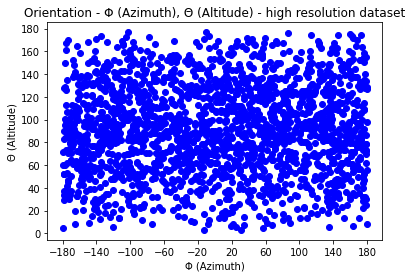

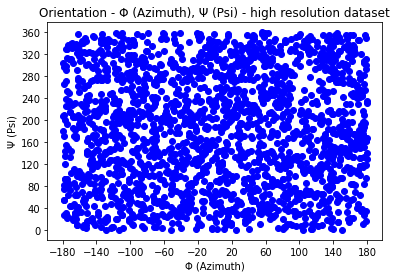

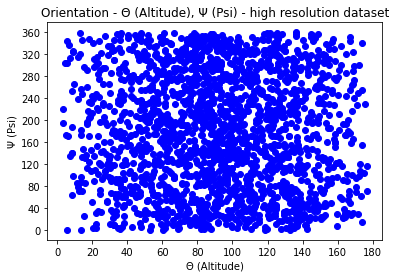

In [11]:
plot_distribution_2d(conf_path, subset)

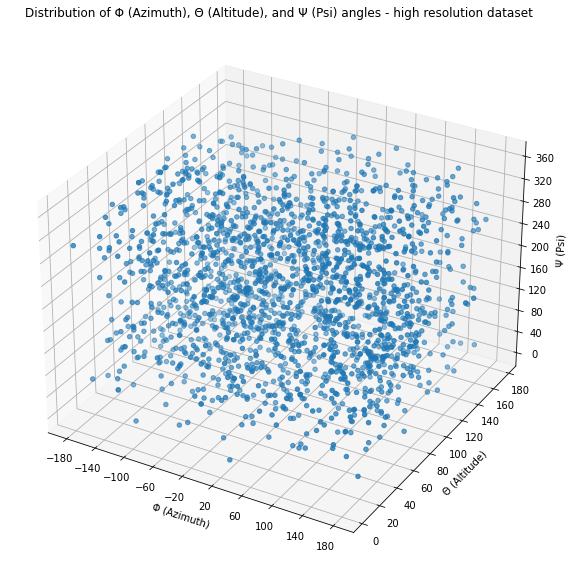

In [12]:
plot_distribution_3d(conf_path, subset)

We use the information from the same config file as above to plot a bar graph that represents the number of data with each conformation.
The function conformation_bargraph displays a bar graph for all conformations within the dataset. 
The parameter for the function is:
* data_file_path: path to the text file containing information about the properties of the dataset.
* resolution: The resolution of the selected angles, for labeling the bar graph

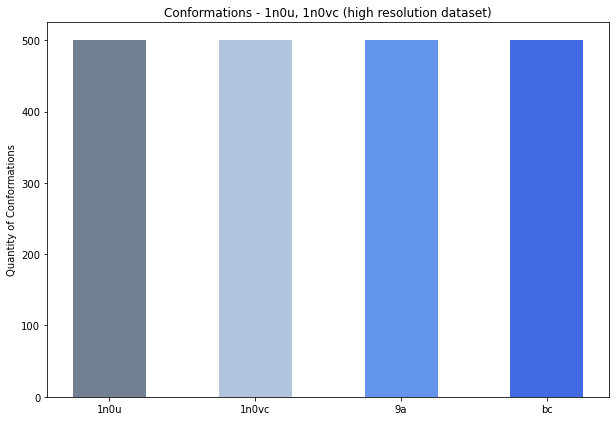

In [13]:
conformation_bargraph(conf_path, subset)

Then plot a bar graph that represents the number of data with each protein type (if there are more than 1 protein type).
The function protein_type_bargraph displays a bar graph for protein type frequency. 
The parameter for the function is:
* data_file_path: path to the text file containing information about the properties of the dataset
* resolution: The resolution of the selected angles, for labeling the bar graph

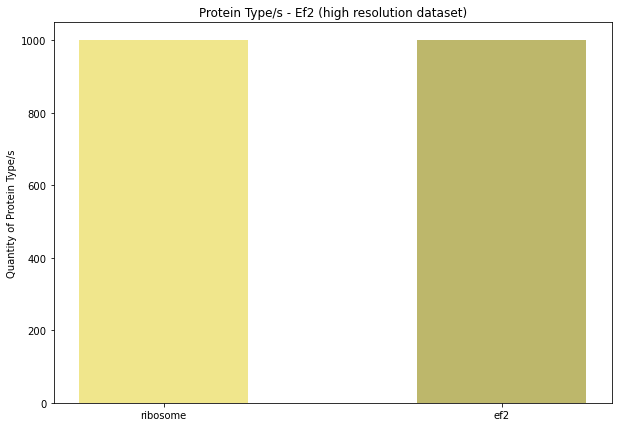

In [6]:
protein_type_bargraph(conf_path, subset)

Considering the distribution of angles, and the frequency of conformations and protein type/s, we can move on to the next portion of our notebook where we will be learning about **autoencoders.** 

## **2. Training of an autoencoder**

![title](images/autoencoder.png)

The images are processed by an autoencoder that captures key information and produces a tensor representation of each pattern. This tensor representation is referred to as **latent space**. The autoencoder consists of an encoder and a decoder. For the default autoencoder, the encoder has 3 convolutional filters and downsampling layers. The decoder has the reverse structure of the encoder. In general autoencoder can have multiple layers. A detailed architecture of the layers of the default autoencoder can be seen in <b>Figure 8</b>.

<div>
<img src="images/encoder.png" width="600"/>
</div>

<center><b>Figure 8:</b> The encoder architecture composed of convolution, pooling, flatten and dense layers. The decoder has the reverse structure of the encoder.
    
The dimension of latent space represents the amount of encoded feature information of a given dataset. The framework was tested on six test cases. The feature extraction stage was executed for a range of latenspace values.
    
**Note:** The optimal latentspace for the default autoencoder is selected as 20 after testing on several test cases. 

To successfully execute the feature extraction portion of the notebook, we must initialize the parameters required to train the autoencoder. The following are required parameters along with their default values.

 * `code_size`: deafult - 20; the latent space dimension for the autoencoder
 * `epochs`: default - 2; the number of times that the model will access the entire data
 * `batch_size`: default - 16; amount of samples that will be trained in batches
 * `optimizer`: default - adamax; optimizing method. Click [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) for more optimizers
 
While these parameters are set up by default, users can simple edit these parameters and observe the framework performance by typing in the desired values.

In [6]:
##### Set the parameters for the feature extraction stage 
feature_extraction_parameters = {
    ##### Set the lenght of the latent space generated by the autoencoder for representing the images 
    'code_size': 20, 
    ##### Set the number of epochs that the model will run with the entire dataset
    'epochs': 10,
    ##### Set the amount of samples that will be trained in batches
    'batch_size': 16,
    ##### Set an optimizer for the gradient descent algorithm. 
    ##### Check here for more options https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    'optimizer': 'adamax'
    }

We also examine the structure of the autoencoder created using keras library's sequential model feature.

The function build_autoencoder_layers generates layers of an autoencoder. Tensorflow's keras package is used to build each layer in the encoder and decoder.

The parameters for the function are:
* conf: path to the configs file used for feature extraction
* img_shape: input shape or shape of the image of diffraction patterns
* code_size: latent space dimension

In [16]:
# Autoencoder
def build_autoencoder_layers(conf, img_shape, code_size):
    """Convolutional Autoencoder
    The function generates layers of an autoencoder. Tensorflow's keras package is used to build each layer in the encoder and decoder. 
    
    Parameters
    ----------
    conf: str; required; path to the configs file used for feature extraction
    img_shape: input shape or shape of the image of diffraction patterns
    code_size: int; required; latent space dimension
    
        
    Returns
    ----------
    returns encoder and decoder objects that were created in the function
    
    """


    # encoder
    encoder = tf.keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))

    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
    #print(encoder.output_shape)
    encoder.add(L.MaxPool2D(pool_size=(3, 3), padding='same'))
    #print(encoder.output_shape)
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
    #print(encoder.output_shape)
    encoder.add(L.MaxPool2D(pool_size=(3, 3), padding='same'))
    #print(encoder.output_shape)
    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
    #print(encoder.output_shape)
    encoder.add(L.MaxPool2D(pool_size=(3, 3), padding='same'))
    #print(encoder.output_shape)
    encoder.add(L.Flatten())
    #print(encoder.output_shape)
    encoder.add(L.Dense(code_size))
    #print(encoder.output_shape)

    # decoder
    decoder = tf.keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))
    #print(decoder.output_shape)

    decoder.add(L.Dense(800))
    #print(decoder.output_shape)
    decoder.add(L.Reshape((5, 5, 32)))
    #print(decoder.output_shape)
    decoder.add(L.UpSampling2D((3, 3)))
    #print(decoder.output_shape)
    decoder.add(L.Conv2D(64, (3, 3), activation='relu', padding='same'))
    #print(decoder.output_shape)
    decoder.add(L.UpSampling2D((3, 3)))
    #print(decoder.output_shape)
    decoder.add(L.Conv2D(128, (3, 3), activation='relu'))
    #print(decoder.output_shape)
    decoder.add(L.UpSampling2D((3, 3)))
    #print(decoder.output_shape)
    decoder.add(L.Conv2D(1, (2, 2), activation=None))
    #print(decoder.output_shape)

    return encoder, decoder

Using the autoencoder architecture provided by the build_autoencoder_layers function, we run the feature extraction function along with the hyperparameters. 

In the cells below, we define the hyperparameters code size (latent space dimension), epochs, batch size, and optimizer. Then, we execute the feature extraction stage of the framework.

The function feature_extraction_main extracts feature and creates tensor representation of these features. The decoder reconstructs the images with the information from the tensor representation. This function is part of the autoencoder_feature_extraction.py module.

The parameters for the function are:
* config_file_path: path to the configs file used for feature extraction
* parameters: code size (latent space dimension), epochs, batch size, and optimizer values
* build_autoencoder_layers: function holding the encoder and decoder structure

In [19]:
feature_extraction_main(conf_path, feature_extraction_parameters, build_autoencoder_layers, subset)

Training autoencoder
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 43, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 43, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None,

2022-05-18 13:56:26.279155: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1558] Found device 0 with properties: 
pciBusID: 0004:04:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-18 13:56:26.279223: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.2
2022-05-18 13:56:26.279244: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-18 13:56:26.279270: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-18 13:56:26.279291: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-05-18 13:56:26.279312: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolv

Train on 1984 samples
Epoch 1/10
1984/1984 [==============================] - 2s 962us/sample - loss: 4.7984e-04
Epoch 2/10
1984/1984 [==============================] - 1s 673us/sample - loss: 3.3304e-04
Epoch 3/10
1984/1984 [==============================] - 1s 680us/sample - loss: 2.9932e-04
Epoch 4/10
1984/1984 [==============================] - 1s 665us/sample - loss: 2.8100e-04
Epoch 5/10
1984/1984 [==============================] - 1s 666us/sample - loss: 2.6635e-04
Epoch 6/10
1984/1984 [==============================] - 1s 681us/sample - loss: 2.5900e-04
Epoch 7/10
1984/1984 [==============================] - 1s 689us/sample - loss: 2.5082e-04
Epoch 8/10
1984/1984 [==============================] - 1s 683us/sample - loss: 2.4670e-04
Epoch 9/10
1984/1984 [==============================] - 1s 717us/sample - loss: 2.4339e-04
Epoch 10/10
1984/1984 [==============================] - 1s 676us/sample - loss: 2.3847e-04
Outputing results...


## **3. Modeling a machine learning predictor**
The latent space is also used to train and validate traditional machine learning models such as k-nearest neighbors (kNN). We use a kNN-angle regressor for predicting the orientation and a kNN-classificator for predicting different protein conformations and types.

In the cells below, we define the hyperparameters for the kNN-classificator. The hyperparameters are:
* `knn_trials`: default - 5; the number of kNN trials
* `k_max`: default - 3; maximum value for k in the k nearest neighbor/s method
* `knn_average`: default - vector_mean; kNN average method.

Again, these parameters are set up by default but users can simply edit these parameters and observe the framework performance by typing in the desired values. Then, we execute the prediction stage of the framework. 

In [7]:
##### Set the parameters for the knn modeling stage

##### Set the value for the maximum K neighbors that you want to run
k_max = 20
prediction_parameters = []
for k_value in range(k_max-1):
    parameters = {
    ##### Set the number of trials that you want to run each K (cross-validation)
    'knn_trials': 5,
    ##### Set the average measurent to use in order to calculate the average orientation among the K neighbors
    ##### Options: 
    #####       vector_mean -> when predicting 2 angles
    #####       vector_mean_3 -> when predicting 3 angles
    'knn_average': 'vector_mean_3',
    'k': k_value + 2
    }
    prediction_parameters.append(parameters)

The function predict_properties_main performs prediction of orientation, conformation, and protein type of protein structure diffraction patterns using a kNN angle regressor and kNN-classificator.

The parameters for the function are:
* configs_path: path to the configs file used for prediction
* params: values for no. of kNN trials, k value for k nearest neighbor/s, and kNN average method saved as a list of dictionaries

In [24]:
for params in prediction_parameters:
    predict_properties_main(conf_path, params)

Initiating for  2  nearest neighbors
Saving trials 2  nearest neighbors
Initiating for  3  nearest neighbors
Saving trials 3  nearest neighbors
Initiating for  4  nearest neighbors
Saving trials 4  nearest neighbors
Initiating for  5  nearest neighbors
Saving trials 5  nearest neighbors
Initiating for  6  nearest neighbors
Saving trials 6  nearest neighbors
Initiating for  7  nearest neighbors
Saving trials 7  nearest neighbors
Initiating for  8  nearest neighbors
Saving trials 8  nearest neighbors
Initiating for  9  nearest neighbors
Saving trials 9  nearest neighbors
Initiating for  10  nearest neighbors
Saving trials 10  nearest neighbors
Initiating for  11  nearest neighbors
Saving trials 11  nearest neighbors
Initiating for  12  nearest neighbors
Saving trials 12  nearest neighbors
Initiating for  13  nearest neighbors
Saving trials 13  nearest neighbors
Initiating for  14  nearest neighbors
Saving trials 14  nearest neighbors
Initiating for  15  nearest neighbors
Saving trials 15

### **3.a Tune ML models' hyperparameter**

Now, we analyze the root mean squared errors from our feature extraction phase of the framework to find the optimal value of the k used for k-nearest neighbor for our kNN algorithms. All resolutions will have their own optimal 'k' value.

The function knn_k_selection renders three graphs (one for each resolution). Each plot has the median and root mean squared errors on the y-axis for corresponding k values on the x-axis.
The parameters for the function are:
* configs_path: path to the default configs directory
* k_max: maximum value for k in the k nearest neighbor/s method

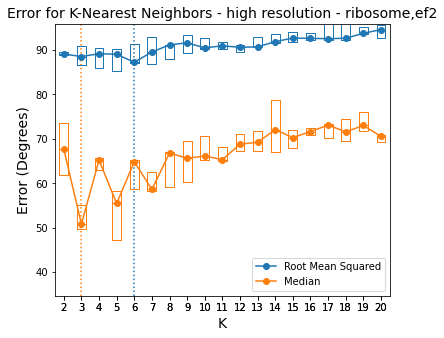

In [9]:
knn_k_selection(conf_path, k_max)

For our test case, according to the root mean squared values from the above three figures, we can derive the k values. For the high, medium, and low resolution dataset with latenspace 20, the k values will be 2, 8, and 2 respectively.

In short, this leads us to test the prediction phase of our XPSI framework with 20 latentspace for all resolutions. And, we find that the high, medium, and low resolution dataset gives optimal results with 2, 8, and 2 nearest neighbors respectively. 

### **3.b Validate the predictions through error degree, psi difference, and conformation accuracy**

Information on Validation: comment on box plots, what they represent, and how to read the diagrams. Mention bias and outliers. For each boxplot explain what information needs to be retained from each validation metric.

We will now compare the Error Degree, Psi Difference, and Conformation Accuracy using box plots. The edge whiskers of box plots represent the minimum and maximum of the data, the box itself has a line within itself (orange in the figures below) that represent the median of the data, and the edges of the boxes represent the first and third quadrant. 
The boxplots we will see below will help us compare different metrics of validation for any resolution of dataset.

In the cells below, we define the k value for the k nearest neighbors method for the evaluation of errors and accuracies:
* `k_nearest_neighbors`: default - 2; k value for the k nearest neighbor/s

NOTE: The `k_nearest_neighbors` is defined as a list to anticipate more that one resolution of dataset. For example, single resolution would require nearest_neighbors = [value1], or 

In [8]:
##### Select the K that generated the lowest error for each resolution
k_nearest_neighbors = [3]

The function validation_comparison_plots displays three figures. The y-axis of the graphs represents the error degree, psi difference, and conformation accuracy on the y-axis for each resolution on the x-axis. 
* `Error degree` refers to the error in predicting the angles Φ (Azimuth) and Θ (Altitude).
* `Psi difference` refers to the error in predicting the Ψ (Psi) angle.
* `Conformation accuracy` refers to the average resulting prediction accuracy for all conformations in the test case.


The parameters for the function are:
* conf_path: path to the configs directory
* latent_space: the selected latent space size
* k_nearest_neighbors: no. of nearest neighbours for KNN algorithm 

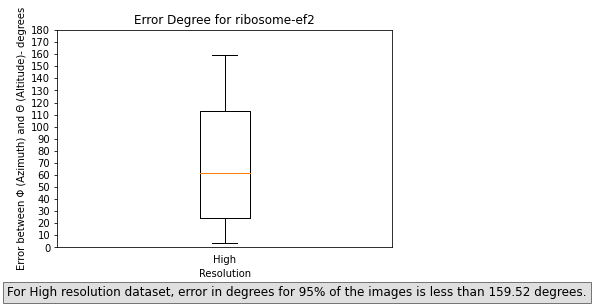

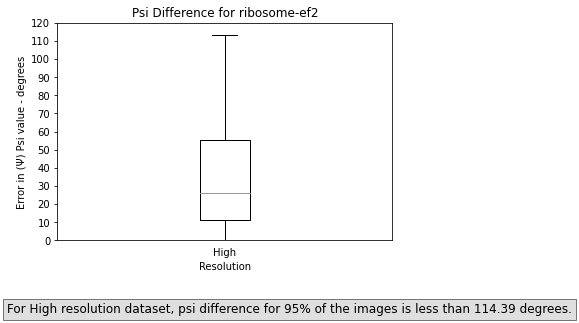

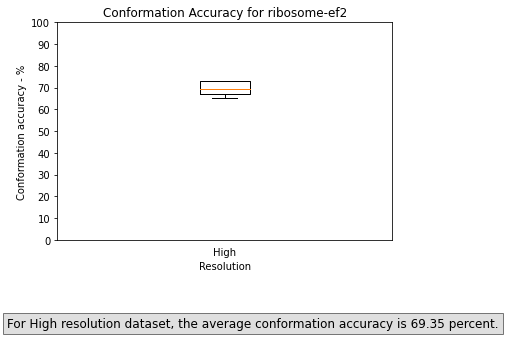

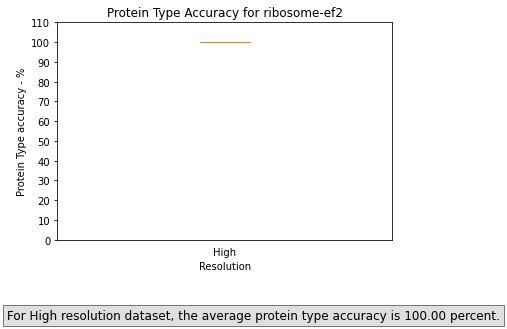

In [9]:
validation_comparison_plots(conf_path, feature_extraction_parameters['code_size'], k_nearest_neighbors)

The function display_confusion_matrix displays the confusion matrix for the conformation property prediction.

The parameters for the function are:
* conf_path: path to the configs directory
* latent_space: the selected latent space size
* k_nearest_neighbors: no. of nearest neighbours for KNN algorithm 
* knn_trials: number of knn trials to executed

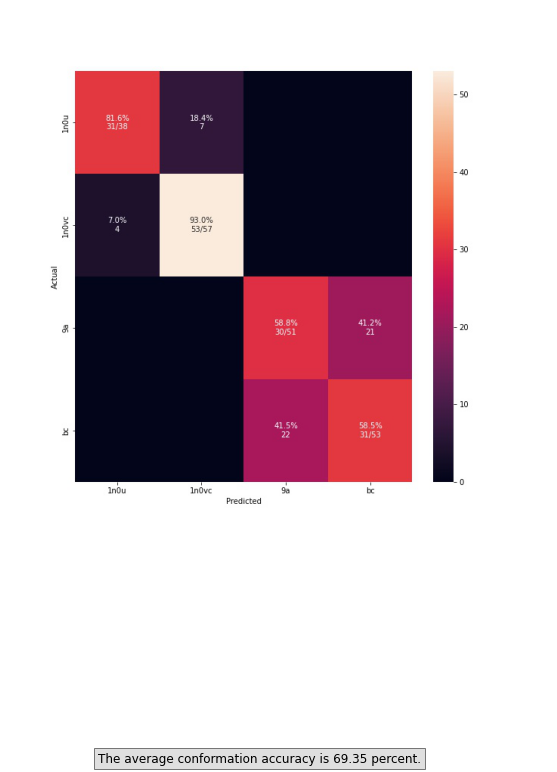

In [10]:
conformation_confusion_matrix(conf_path, feature_extraction_parameters['code_size'], k_nearest_neighbors, parameters['knn_trials'])

The function protein_confusion_matrix displays the confusion matrix for the protein identity prediction.

The parameters for the function are:
* conf_path: path to the configs directory
* latent_space: the selected latent space size
* k_nearest_neighbors: no. of nearest neighbours for KNN algorithm 
* knn_trials: number of knn trials to executed

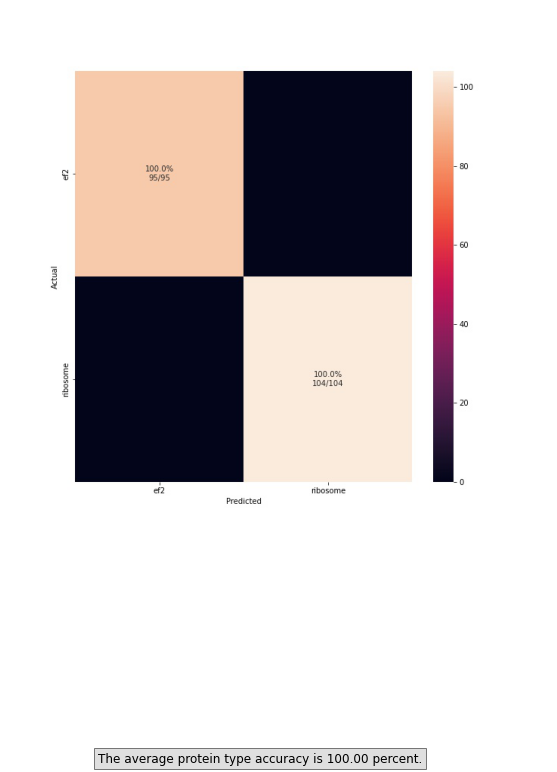

In [11]:
protein_confusion_matrix(conf_path, feature_extraction_parameters['code_size'], k_nearest_neighbors, parameters['knn_trials'])